#**Importing the libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#**Importing the Data**

In [ ]:
data = pd.read_csv("Pumpkin_Seeds_Dataset.csv")
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


In [ ]:
data.shape

(2500, 13)

In [ ]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


#**Finding the null Values**

In [ ]:
data.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

#**Finding Out the Outliers in the Data**

<Axes: >

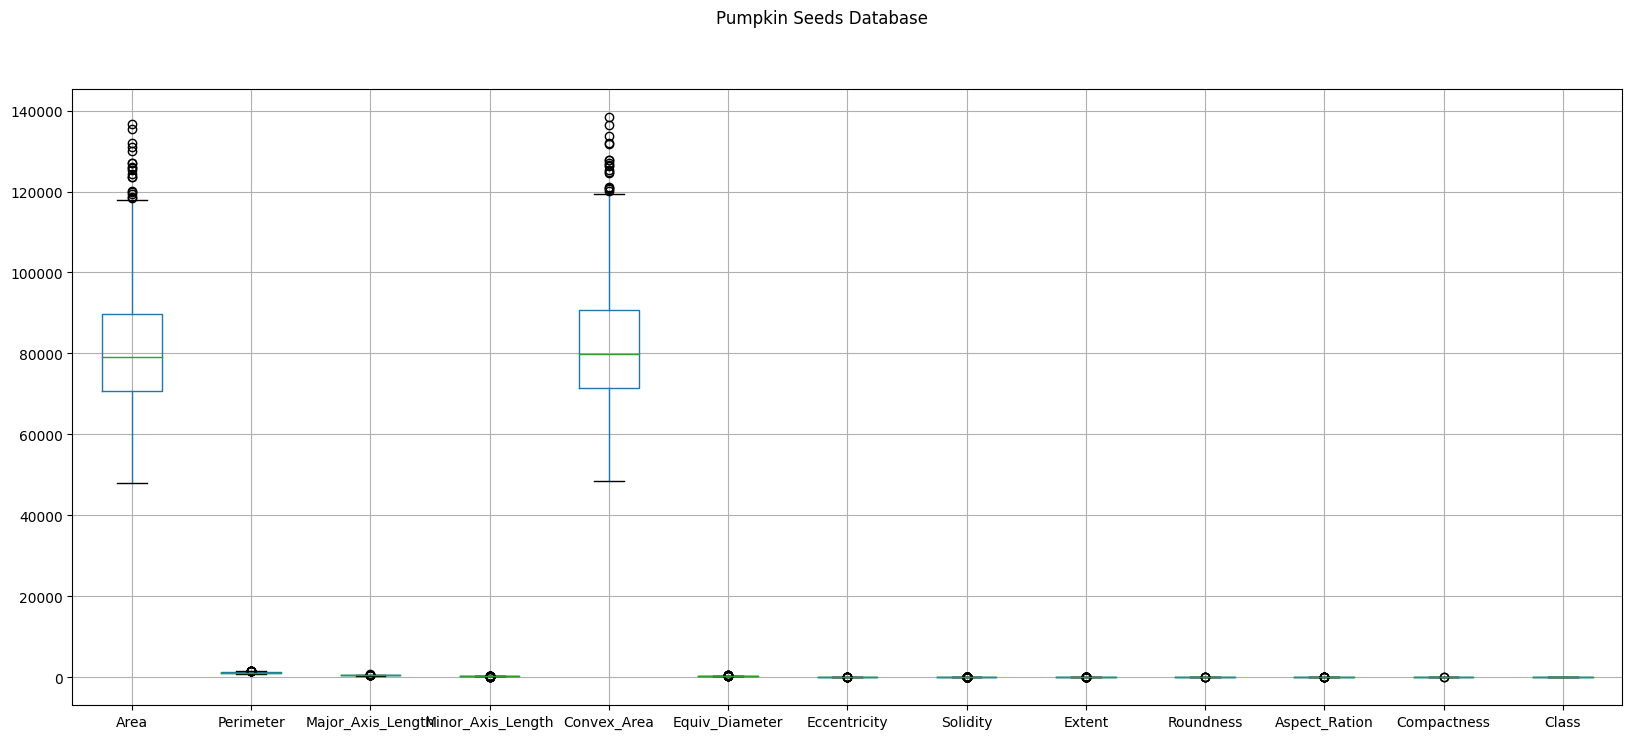

In [ ]:
plt.figure(figsize=(20,8))
plt.suptitle("Pumpkin Seeds Database")
ax = plt.gca()
data.boxplot()

In [ ]:
columns_to_process = ['Area','Convex_Area']

# Step 2 & 3: Calculate the IQR and Define the outlier boundaries for each column
outlier_indices = []
for column_name in columns_to_process:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    outlier_indices.extend(outliers.index)
cleaned_data= data.drop(outlier_indices)

<Axes: >

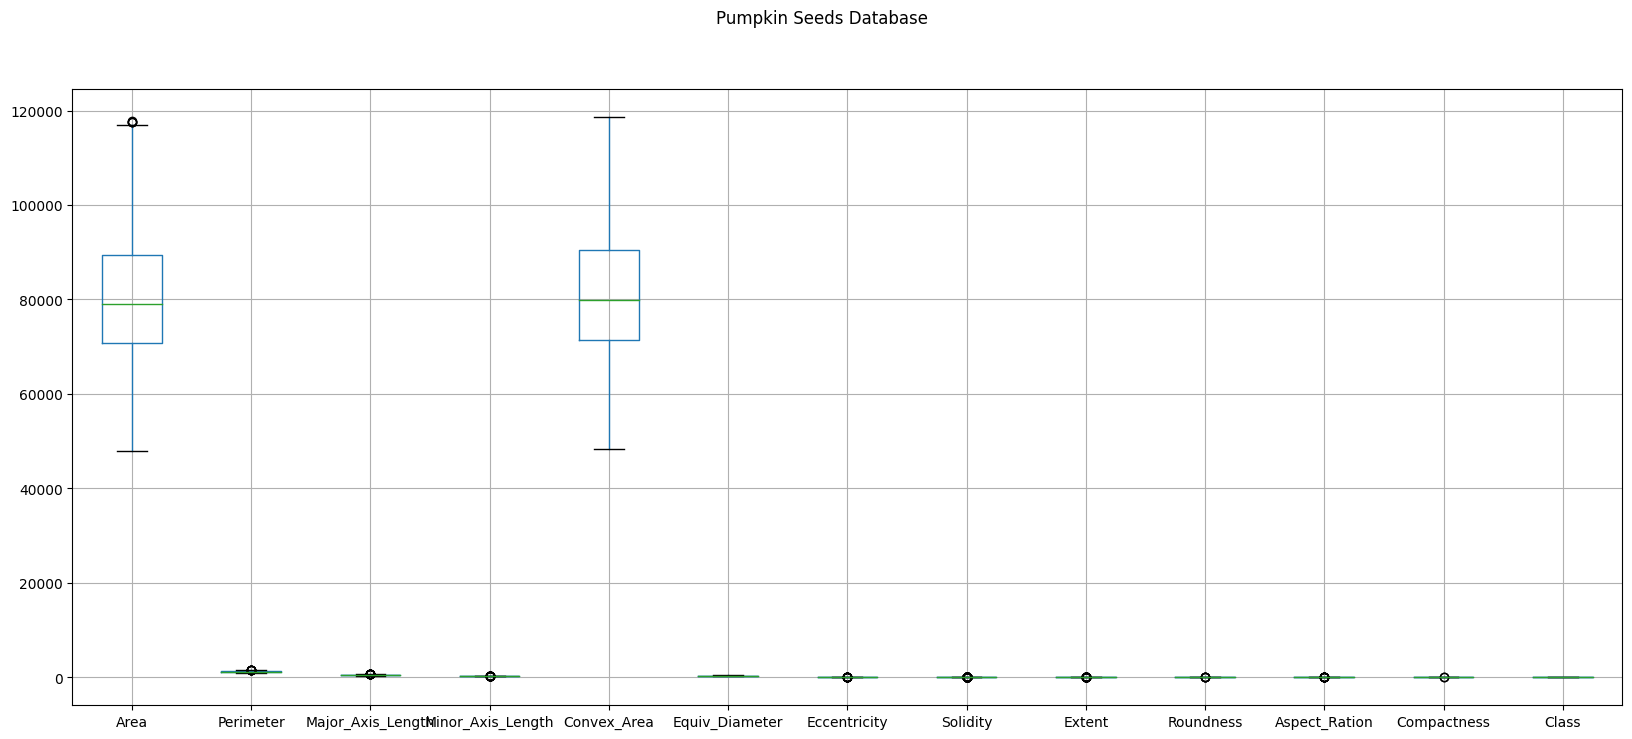

In [ ]:
plt.figure(figsize=(20,8))
plt.suptitle("Pumpkin Seeds Database")
ax = plt.gca()
cleaned_data.boxplot()

In [ ]:
cleaned_data.shape


(2482, 13)

#**Training the Model**

In [ ]:
from sklearn.model_selection import train_test_split
X1 = cleaned_data.iloc[:, :-1]
y1 = cleaned_data.iloc[:, -1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X1_train= st_x.fit_transform(X1_train)
X1_test= st_x.transform(X1_test)

#**Choosing and training the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X1_train, y1_train)


LogisticRegression(max_iter=1000)

#**Predicting the test results**

In [ ]:
#predicting test results
Y_Pred_test = lr.predict(X1_test)
Y_Pred_train = lr.predict(X1_train)
y_pred1=lr.predict_proba(X1_test)
y_pred_train = lr.predict(X1_train)

#**Performance Measures**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score
accuracy=accuracy_score(y1_train,y_pred_train)
print("training_Accuracy_score: ",accuracy)
accuracy=accuracy_score(y1_test,Y_Pred_test)
print("testing_Accuracy_score: ",accuracy)
roc_auc = roc_auc_score(y1_test, Y_Pred_test)
print("ROC AUC Score:", roc_auc)
scores = cross_val_score(lr, X1, y1, scoring="accuracy", cv=10)
print("Cross-validation scores:", scores.mean())
recall=recall_score(y1_test,Y_Pred_test)
print("Recall_score: ",recall)
precision=precision_score(y1_test,Y_Pred_test)
print("Precision_score: ",precision)
cr =  classification_report(y1_test,Y_Pred_test)
print(cr)

training_Accuracy_score:  0.8806045340050378
testing_Accuracy_score:  0.8812877263581489
ROC AUC Score: 0.8813236818240705
Cross-validation scores: 0.8746874595154812
Recall_score:  0.8634538152610441
Precision_score:  0.8958333333333334
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       248
           1       0.90      0.86      0.88       249

    accuracy                           0.88       497
   macro avg       0.88      0.88      0.88       497
weighted avg       0.88      0.88      0.88       497



In [ ]:
matrix=confusion_matrix(y1_test,Y_Pred_test)
print("Confusion_matrix: \n",matrix)

Confusion_matrix: 
 [[223  25]
 [ 34 215]]


#**Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Specify parameters

c_values = list(np.arange(1, 10))

param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
    {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]
grid = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy')
grid.fit(X1_train,y1_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
predictionforest = grid.best_estimator_.predict(X1_test)
y_pred2=grid.best_estimator_.predict_proba(X1_test)
y_pred2_train = grid.best_estimator_.predict(X1_train)

print(confusion_matrix(y1_test,predictionforest))
#print ("{0}".format(metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])))
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y1_test, predictionforest, labels=[1, 0])))
training_accuracy=accuracy_score(y1_train,y_pred2_train)
print("training_accuracy: ",training_accuracy )
acc_hyper = accuracy_score(y1_test,predictionforest)
print ("testing_Accuracy:" ,acc_hyper)
print("roc_auc_score after hypertuning: {}".format(roc_auc_score(y1_test, y_pred2[:,1])))
print("CV_score: {}".format(cross_val_score(lr, X1, y1, cv=10, scoring='accuracy').mean()))

{'C': 5, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8841302471955738
LogisticRegression(C=5, max_iter=1000, multi_class='ovr', penalty='l1',
                   solver='liblinear')
[[224  24]
 [ 33 216]]
Classification Report
              precision    recall  f1-score   support

           1       0.90      0.87      0.88       249
           0       0.87      0.90      0.89       248

    accuracy                           0.89       497
   macro avg       0.89      0.89      0.89       497
weighted avg       0.89      0.89      0.89       497

training_accuracy:  0.8836272040302267
testing_Accuracy: 0.8853118712273642
roc_auc_score after hypertuning: 0.9510623137712139
CV_score: 0.8746874595154812




#**After performing hyperparameter tuning, all performance measures show improvement compared to using only logistic regression**


